# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing Dataset

In [12]:
dataset = pd.read_csv('last_3_years_all_batsmans_records.csv')
X = dataset.iloc[:, [12, 13]].values

# Using the elbow method to find the optimal number of clusters

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


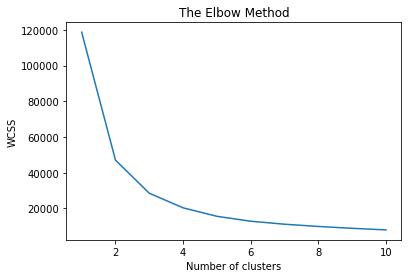

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

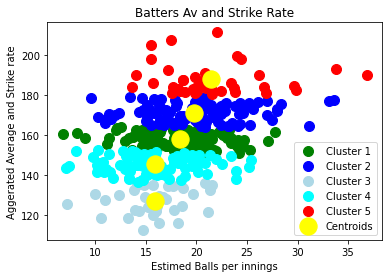

In [17]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'lightblue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Batters Av and Strike Rate')
plt.xlabel('Estimed Balls per innings')
plt.ylabel('Aggerated Average and Strike rate')
plt.legend()
plt.show()

In [18]:
kmeans.labels_ 

array([4, 4, 1, 1, 1, 4, 4, 1, 1, 1, 0, 1, 0, 1, 1, 4, 4, 4, 1, 1, 3, 0,
       1, 3, 1, 1, 0, 1, 0, 1, 0, 4, 1, 1, 0, 1, 0, 1, 4, 0, 3, 3, 1, 4,
       4, 1, 3, 0, 4, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 3, 1, 4, 1, 1, 0,
       1, 4, 1, 0, 3, 1, 1, 0, 1, 1, 1, 2, 4, 0, 4, 1, 0, 0, 0, 1, 4, 0,
       2, 3, 0, 1, 2, 0, 3, 1, 4, 0, 1, 0, 1, 0, 3, 0, 4, 2, 0, 1, 1, 1,
       1, 0, 1, 1, 4, 0, 1, 3, 0, 3, 1, 3, 4, 0, 1, 0, 3, 0, 1, 4, 0, 0,
       0, 1, 4, 1, 4, 1, 3, 0, 0, 2, 4, 1, 3, 3, 3, 0, 3, 1, 0, 0, 0, 1,
       3, 0, 3, 1, 3, 4, 3, 3, 0, 3, 0, 2, 4, 1, 0, 0, 4, 0, 1, 2, 3, 3,
       0, 0, 0, 4, 1, 1, 0, 0, 4, 2, 0, 0, 0, 3, 1, 1, 1, 3, 1, 3, 3, 1,
       1, 0, 2, 3, 1, 0, 0, 4, 0, 2, 3, 4, 0, 1, 4, 3, 1, 3, 2, 0, 1, 4,
       2, 0, 0, 3, 2, 1, 0, 1, 3, 1, 1, 0, 1, 2, 1, 3, 3, 3, 1, 0, 0, 1,
       3, 1, 2, 1, 1, 3, 2, 1, 2, 3, 0, 1, 0, 0, 0, 2, 3, 0, 3, 3, 1, 0,
       1, 3, 2, 4, 2, 1, 2, 0, 4, 3, 0, 4, 0, 0, 1, 0, 0, 2, 3, 1, 1, 3,
       1, 1, 3, 1, 3, 0, 2, 2, 3, 3, 3, 3, 1, 1, 2,

In [19]:
dataset['Cluster'] = kmeans.labels_

In [23]:
cluster_5_players = dataset[dataset['Cluster'] == 4]

In [58]:
cluster_5_players.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,Balls Per Innings,Aggavgstr,Cluster
0,KL Rahul,55,"2,503","1,862",45,55.62,134.43,130,200,108,21,4,36.86,190.05,4
1,DP Conway,47,"1,930","1,399",35,55.14,137.96,105,219,43,16,2,33.85,193.10,4
5,DA Warner,55,"2,085","1,523",46,45.33,136.90,100,194,61,22,1,29.86,182.23,4
6,SR Hain,42,"1,457","1,072",30,48.57,135.91,112,123,37,12,1,29.61,184.48,4
15,MD Gunathilaka,20,702,503,17,41.29,139.56,94,94,15,6,0,26.93,180.85,4
16,JC Buttler,53,"1,969","1,368",49,40.18,143.93,124,193,93,11,5,26.65,184.11,4
17,JM Bairstow,45,"1,714","1,148",42,40.81,149.30,114,169,81,13,2,26.24,190.11,4
31,WA Young,16,601,381,15,40.07,157.74,101,39,31,4,1,24.45,197.81,4
38,AB de Villiers,77,"2,491","1,607",56,44.48,155.01,100,179,124,22,1,24.00,199.49,4
43,BKG Mendis,18,590,408,16,36.88,144.61,85,50,26,4,0,23.80,181.49,4


In [25]:
cluster_2_players = dataset[dataset['Cluster'] == 1]

In [26]:
cluster_2_players.head(30)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,Balls Per Innings,Aggavgstr,Cluster
2,Mohammad Rizwan,35,"1,313","1,034",26,50.50,126.98,83,122,29,13,0,33.63,177.48,1
3,Babar Azam,62,"2,497","1,923",53,47.11,129.85,114,268,42,21,2,33.12,176.96,1
4,Tamim Iqbal,47,"1,677","1,367",40,41.92,122.68,141,171,56,11,2,31.12,164.60,1
7,RL Chase,21,671,513,15,44.73,130.80,85,50,30,6,0,28.34,175.53,1
8,D Foxcroft,17,526,408,12,43.83,128.92,82,49,17,5,0,28.00,172.75,1
9,RD Gaikwad,39,"1,382","1,044",35,39.49,132.38,101,135,47,12,1,27.99,171.87,1
11,JW Wells,55,"1,580","1,266",37,42.70,124.80,73,124,30,11,0,27.50,167.50,1
13,S Dhawan,67,"2,279","1,730",60,37.98,131.73,106,251,55,16,2,27.03,169.71,1
14,Mushfiqur Rahim,46,"1,459","1,089",34,42.91,133.98,98,127,49,9,0,27.02,176.89,1
18,T Kohler-Cadmore,44,"1,439","1,056",36,39.97,136.27,96,107,69,14,0,26.13,176.24,1


In [27]:
cluster_1_players = dataset[dataset['Cluster'] == 0]

In [28]:
cluster_1_players.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,Balls Per Innings,Aggavgstr,Cluster
10,JJS Sangha,18,548,448,14,39.14,122.32,91,43,14,4,0,27.73,161.46,0
12,AZ Lees,17,489,410,13,37.62,119.27,77,36,10,4,0,27.09,156.89,0
21,N Jagadeesan,16,440,371,13,33.85,118.60,78,39,15,3,0,25.33,152.45,0
26,MK Pandey,44,"1,249","1,010",37,33.76,123.66,83,104,40,10,0,24.69,157.42,0
28,SS Iyer,55,"1,558","1,277",48,32.46,122.00,88,129,46,9,0,24.57,154.46,0
30,RI Keogh,29,677,570,18,37.61,118.77,59,50,14,4,0,24.46,156.38,0
34,KS Williamson,44,"1,063",913,31,34.29,116.43,79,92,28,7,0,24.23,150.72,0
36,SE Marsh,38,"1,147",907,37,31.00,126.46,96,100,36,10,0,24.13,157.46,0
39,Shubman Gill,64,"1,799","1,464",57,31.56,122.88,96,175,43,13,0,24.00,154.44,0
47,V Kohli,60,"1,676","1,345",54,31.04,124.61,100,144,41,10,1,23.41,155.65,0


In [29]:
cluster_4_players = dataset[dataset['Cluster'] == 3]

In [30]:
cluster_4_players.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,Balls Per Innings,Aggavgstr,Cluster
20,R Vasconcelos,15,431,370,14,30.79,116.49,78,52,4,2,0,25.37,147.28,3
23,DM Bravo,23,522,478,15,34.80,109.21,58,24,33,4,0,25.22,144.01,3
40,SA Northeast,32,808,736,29,27.86,109.78,89,68,15,5,0,23.95,137.64,3
41,M Klinger,18,478,421,17,28.12,113.54,102,42,9,1,1,23.94,141.66,3
46,JD Libby,31,818,687,27,30.30,119.07,78,64,7,4,0,23.47,149.37,3
60,Ahmed Shehzad,18,452,386,16,28.25,117.10,99,46,12,5,0,22.52,145.35,3
70,CT Bancroft,50,"1,180",997,40,29.50,118.36,87,89,23,7,0,21.93,147.86,3
89,SS Tiwary,15,351,291,12,29.25,120.62,58,26,10,2,0,21.34,149.87,3
94,WU Tharanga,20,490,422,20,24.50,116.11,77,67,8,2,0,21.10,140.61,3
102,VR Iyer,25,604,504,23,26.26,119.84,67,61,22,5,0,20.86,146.10,3


In [31]:
cluster_3_players = dataset[dataset['Cluster'] == 2]

In [33]:
cluster_3_players.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,Balls Per Innings,Aggavgstr,Cluster
77,Mominul Haque,21,464,425,18,25.78,109.18,91,39,8,2,0,21.59,134.96,2
88,BA Godleman,30,662,614,27,24.52,107.82,92,57,16,4,0,21.38,132.34,2
92,D Ramdin,25,484,492,21,23.05,98.37,50,24,17,1,0,21.18,121.42,2
105,Mohammad Naim,33,723,652,29,24.93,110.89,105,60,33,2,1,20.85,135.82,2
141,JCT Boyle,20,417,385,19,21.95,108.31,69,37,4,1,0,19.66,130.26,2
165,LRPL Taylor,16,289,264,12,24.08,109.47,65,15,16,1,0,18.70,133.55,2
173,Towhid Hridoy,19,338,328,16,21.12,103.05,51,18,12,1,0,18.56,124.17,2
185,AG Wakely,17,274,285,14,19.57,96.14,47,14,4,0,0,18.20,115.71,2
200,DC Thomas,21,379,367,20,18.95,103.27,71,42,8,3,0,17.83,122.22,2
207,SM Solia,24,442,393,20,22.10,112.47,75,38,11,3,0,17.69,134.57,2


In [47]:
hc_dataset = pd.read_csv('last_3_years_all_batsmans_records.csv')
X = dataset.iloc[:, [12, 13]].values

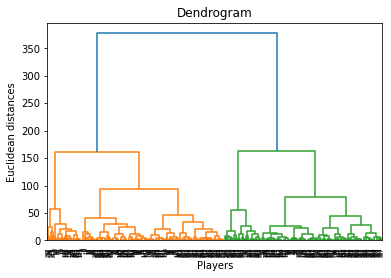

In [48]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Players')
plt.ylabel('Euclidean distances')
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

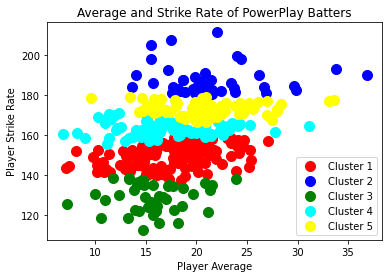

In [50]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4,0], X[y_hc == 4,1], s = 100, c = 'Yellow',label = 'Cluster 5')
plt.title('Average and Strike Rate of PowerPlay Batters')
plt.xlabel('Player Average')
plt.ylabel('Player Strike Rate')
plt.legend()
plt.show()

In [54]:
hc_dataset['Cluster'] = hc.labels_

In [55]:
cluster_2 = hc_dataset[hc_dataset['Cluster'] == 1]

In [56]:
cluster_2_order = cluster_2.sort_values("Balls Per Innings",ascending = False)

In [57]:
cluster_2_order.head(40)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,Balls Per Innings,Aggavgstr,Cluster
0,KL Rahul,55,"2,503","1,862",45,55.62,134.43,130,200,108,21,4,36.86,190.05,1
1,DP Conway,47,"1,930","1,399",35,55.14,137.96,105,219,43,16,2,33.85,193.10,1
5,DA Warner,55,"2,085","1,523",46,45.33,136.90,100,194,61,22,1,29.86,182.23,1
6,SR Hain,42,"1,457","1,072",30,48.57,135.91,112,123,37,12,1,29.61,184.48,1
15,MD Gunathilaka,20,702,503,17,41.29,139.56,94,94,15,6,0,26.93,180.85,1
16,JC Buttler,53,"1,969","1,368",49,40.18,143.93,124,193,93,11,5,26.65,184.11,1
17,JM Bairstow,45,"1,714","1,148",42,40.81,149.30,114,169,81,13,2,26.24,190.11,1
31,WA Young,16,601,381,15,40.07,157.74,101,39,31,4,1,24.45,197.81,1
38,AB de Villiers,77,"2,491","1,607",56,44.48,155.01,100,179,124,22,1,24.00,199.49,1
43,BKG Mendis,18,590,408,16,36.88,144.61,85,50,26,4,0,23.80,181.49,1
